## <h1><center>Telecom Churn Prediction</center></h1>

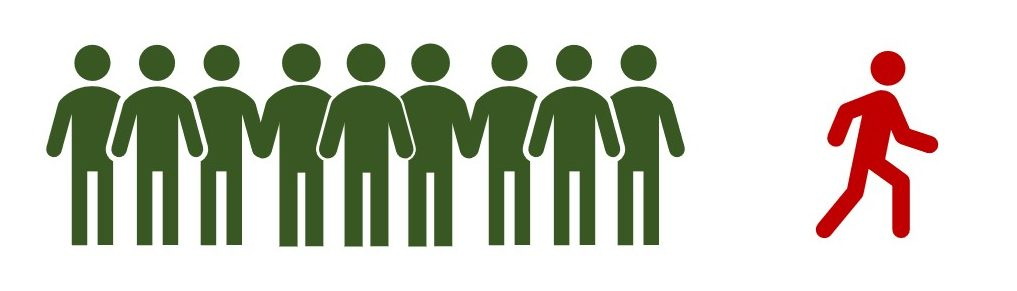

### Table of Conents <a ID=0.1></a>

1. [Problem Statement](#1)
2. [Reading and Understanding Data](#2)
3. [Data Cleansing](#3)
4. [Feature Engineering and Deriving target variable](#4)
5. [EDA](#5)
    1. [Inferences](#5.1)
6. [Splitting Data and Rescaling Features](#6)
7. [Model Building](#7)
    1. [Logistic Regression](#7.1)
    2. [Logistic Regression with SMOTETomek](#7.2)
    3. [Decision Tree](#7.3)
    4. [Decision Tree with SMOTETomek](#7.4)
    5. [Random Forest](#7.5)
    6. [Logistic Regression with PCA](#7.6)
8. [Finalizing the model based on the results](#8)
9. [Important Features](#9)
10. [Business Reccomendations](#10)

## 1. Problem Statement: <a ID=1></a>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.


For many incumbent operators, retaining high profitable customers is the number one business goal.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to <font color = blue> *identify customers at high risk of churn and identify the main indicators of churn.* </font>

<font color=red>**Objective:**</font>

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## 2. Reading and Understanding data<a ID=2></a>
[Table of Contents](#0.1)

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows",300)

In [2]:
data = pd.read_csv('telecom_churn_data.csv')

# Checking top 5 rows
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Checking the shape of dataframe

print('Total number of records in the raw data: ',data.shape[0])
print('Total number of features in the raw data: ',data.shape[1])

Total number of records in the raw data:  99999
Total number of features in the raw data:  226


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
# Statistical summary of Applications DataFrame

data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## 2. Data Cleaning<a ID=3></a>
[Table of Contents](#0.1)

### Removing date columns which are not useful for analysis

In [6]:
date_cols = data.select_dtypes(include='object').columns

len(date_cols)

12

In [7]:
data.drop(date_cols,axis=1,inplace=True)

data.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,

### Removing circle_id and setting mobile number as index 

In [8]:
data.drop('circle_id',axis=1,inplace=True)

data.set_index('mobile_number',drop=True,inplace=True)

data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,

In [9]:
print('Total number of records in the raw data: ',data.shape[0])
print('Total number of features in the data after dropping columns: ',data.shape[1])

Total number of records in the raw data:  99999
Total number of features in the data after dropping columns:  212


### Checking Null values
#### Creating a data frame with the percentage of null values corresponding to a particular column

In [10]:
def null_df(df):
    null_dict = {'Features':[],'Perc_nulls':[]}
    for col in df.columns:
        null_dict['Features'].append(col)
        null_dict['Perc_nulls'].append(round(df[col].isnull().sum()*(100/len(df[col])),1))
    null_df = pd.DataFrame(null_dict)
    null_df = null_df.sort_values('Perc_nulls',ascending=False,ignore_index=True)
    return null_df
     

In [11]:
null_df(data)

,Features,Perc_nulls
0,max_rech_data_6,74.8
1,total_rech_data_6,74.8
2,count_rech_2g_6,74.8
3,fb_user_6,74.8
4,count_rech_3g_6,74.8
5,av_rech_amt_data_6,74.8
6,arpu_3g_6,74.8
7,arpu_2g_6,74.8
8,night_pck_user_6,74.8
9,max_rech_data_7,74.4


#### From the above dataframe we can see that 36 columns have more than 70% missing values. hence dropping them.

In [12]:
null_features = []

for feature in null_df(data)[null_df(data)['Perc_nulls'] >= 40]['Features']:
    null_features.append(feature)
    
data.drop(null_features,axis=1,inplace=True)

print('Total number of records in the raw data: ',data.shape[0])
print('Total number of features in the data after dropping columns: ',data.shape[1])

Total number of records in the raw data:  99999
Total number of features in the data after dropping columns:  176


In [13]:
null_df(data)

,Features,Perc_nulls
0,std_og_t2c_mou_9,7.7
1,roam_og_mou_9,7.7
2,std_ic_t2m_mou_9,7.7
3,loc_og_t2m_mou_9,7.7
4,loc_og_t2f_mou_9,7.7
5,std_ic_t2t_mou_9,7.7
6,loc_og_mou_9,7.7
7,loc_ic_mou_9,7.7
8,std_og_t2t_mou_9,7.7
9,std_og_t2m_mou_9,7.7


In [14]:
data_null = data[null_df(data)[null_df(data)['Perc_nulls'] > 3]['Features']]

data_null.head(3)

,std_og_t2c_mou_9,roam_og_mou_9,std_ic_t2m_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,std_ic_t2t_mou_9,loc_og_mou_9,loc_ic_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,loc_ic_t2f_mou_9,std_og_t2f_mou_9,loc_ic_t2m_mou_9,std_og_mou_9,loc_ic_t2t_mou_9,isd_og_mou_9,spl_og_mou_9,spl_ic_mou_9,og_others_9,loc_og_t2t_mou_9,loc_og_t2c_mou_9,isd_ic_mou_9,ic_others_9,std_ic_t2o_mou_9,std_ic_t2f_mou_9,roam_ic_mou_9,std_ic_mou_9,offnet_mou_9,onnet_mou_9,std_og_t2c_mou_8,std_og_t2m_mou_8,loc_ic_t2f_mou_8,std_og_t2f_mou_8,onnet_mou_8,spl_ic_mou_8,roam_og_mou_8,loc_ic_t2m_mou_8,std_og_mou_8,std_ic_t2o_mou_8,isd_og_mou_8,std_ic_mou_8,loc_ic_t2t_mou_8,spl_og_mou_8,ic_others_8,og_others_8,std_ic_t2f_mou_8,isd_ic_mou_8,loc_og_t2f_mou_8,loc_ic_mou_8,offnet_mou_8,loc_og_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,loc_og_t2m_mou_8,loc_ic_t2t_mou_7,std_ic_t2m_mou_7,loc_ic_mou_7,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,loc_ic_t2t_mou_6,std_ic_t2o_mou_6,loc_ic_t2m_mou_6,std_ic_mou_7,loc_ic_t2m_mou_7,std_ic_t2o_mou_7,std_ic_mou_6,loc_ic_t2f_mou_6,isd_ic_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_7,isd_ic_mou_7,roam_og_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_6,roam_og_mou_7,roam_ic_mou_7,loc_og_t2c_mou_7,roam_ic_mou_6,offnet_mou_7,offnet_mou_6,onnet_mou_7,onnet_mou_6,ic_others_6,ic_others_7,loc_og_t2c_mou_6,loc_og_mou_6,og_others_7,spl_ic_mou_6,og_others_6,spl_og_mou_7,spl_og_mou_6,isd_og_mou_7,isd_og_mou_6,std_og_mou_7,std_og_mou_6,std_og_t2c_mou_7,loc_og_mou_7,std_og_t2c_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_6,spl_ic_mou_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,1.15,0.00,0.00,0.0,0.0,4.13,0.00,0.0,0.0,0.00,0.16,0.00,0.0,0.0,0.00,0.0,0.00,5.44,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7001865778,0.0,0.00,15.01,53.76,0.00,0.00,72.11,173.03,0.00,0.00,0.00,0.0,56.93,0.00,116.09,0.0,0.00,0.00,0.0,18.34,0.00,0.00,0.00,0.0,0.00,0.00,15.01,53.76,18.34,0.0,0.13,3.61,0.00,7.68,0.0,0.0,375.58,0.13,0.0,0.0,14.84,29.23,12.76,0.0,0.0,0.00,0.0,0.00,408.43,304.76,299.54,0.0,7.68,0.00,0.00,2.35,12.49,291.86,29.91,0.00,104.23,5.90,0.00,0.00,1.61,0.0,17.48,0.00,65.38,0.0,5.90,0.00,1.83,0.00,0.00,19.09,8.93,0.00,0.0,0.00,0.00,75.94,11.51,74.56,23.88,0.0,0.0,2.91,0.0,99.84,15.74,78.68,24.11,0.00,0.00,0.0,35.39,0.0,0.00,0.00,23.43,4.68,0.0,0.0,4.58,0.23,0.0,150.51,0.0,0.00,0.00,0.46,0.00,4.11,0.23,0.0
7001625959,0.0,70.94,118.18,28.16,22.24,49.44,64.81,345.41,8.76,9.28,158.19,0.0,38.98,18.04,148.23,0.0,42.08,0.45,0.0,14.39,0.48,0.01,0.36,0.0,3.86,38.49,171.49,118.91,74.81,0.0,75.53,49.63,22.83,37.26,0.0,0.0,38.89,120.94,0.0,0.0,239.03,67.46,96.84,0.0,0.0,43.23,0.0,15.61,155.99,208.36,67.66,0.0,13.58,45.76,22.58,28.69,167.09,38.46,71.11,177.01,208.86,45.18,21.73,58.34,115.69,0.0,14.38,306.66,15.44,0.0,139.33,99.48,0.00,71.29,72.41,229.56,122.29,0.85,0.0,21.79,24.11,16.86,29.34,28.74,7.19,0.0,0.0,135.54,0.0,220.59,143.33,55.24,11.54,0.93,3.14,0.0,60.66,0.0,0.21,0.45,236.84,46.56,0.0,0.0,108.68,47.64,0.0,67.41,0.0,14.76,1.48,67.41,41.81,26.49,4.34,0.0


In [15]:
jun_nulls = []
july_nulls = []
aug_nulls = []
for col in data_null.columns:
    if '6' in col or 'jun' in col:
        jun_nulls.append(col)
    elif '7' in col or 'jul' in col:
        july_nulls.append(col)
    elif '8' in col or 'aug' in col:
        aug_nulls.append(col)

        
print(len(jun_nulls))
print(len(july_nulls))
print(len(aug_nulls))
        

29
29
29


In [16]:
data[jun_nulls].head()

,std_ic_t2m_mou_6,std_ic_t2f_mou_6,loc_ic_t2t_mou_6,std_ic_t2o_mou_6,loc_ic_t2m_mou_6,std_ic_mou_6,loc_ic_t2f_mou_6,isd_ic_mou_6,std_ic_t2t_mou_6,loc_ic_mou_6,roam_og_mou_6,loc_og_t2f_mou_6,loc_og_t2m_mou_6,loc_og_t2t_mou_6,roam_ic_mou_6,offnet_mou_6,onnet_mou_6,ic_others_6,loc_og_t2c_mou_6,loc_og_mou_6,spl_ic_mou_6,og_others_6,spl_og_mou_6,isd_og_mou_6,std_og_mou_6,std_og_t2c_mou_6,std_og_t2f_mou_6,std_og_t2m_mou_6,std_og_t2t_mou_6
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7001865778,5.90,0.00,1.61,0.0,17.48,5.90,0.00,1.83,0.00,19.09,0.0,0.00,11.51,23.88,0.0,15.74,24.11,0.00,0.0,35.39,0.00,0.00,4.68,0.0,0.23,0.0,0.00,0.00,0.23
7001625959,45.18,21.73,115.69,0.0,14.38,139.33,99.48,0.00,72.41,229.56,0.0,24.11,29.34,7.19,0.0,143.33,11.54,0.93,0.0,60.66,0.21,0.45,46.56,0.0,47.64,0.0,1.48,41.81,4.34
7001204172,1.33,1.18,62.08,0.0,113.96,45.99,57.43,0.00,43.48,233.48,0.0,1.91,107.43,73.68,0.0,123.31,99.91,0.00,0.0,183.03,0.59,0.00,10.96,0.0,29.23,0.0,0.00,2.99,26.23
7000142493,1.93,0.00,105.68,0.0,106.84,1.93,1.50,0.00,0.00,214.03,0.0,0.00,67.64,50.31,0.0,76.96,50.31,0.48,0.0,117.96,0.00,0.00,0.00,0.0,9.31,0.0,0.00,9.31,0.00



Statistical information for std_ic_t2m_mou_6 column: 

count    96062.000000
mean        20.722240
std         80.793414
min          0.000000
25%          0.000000
50%          2.030000
75%         15.030000
max       5647.160000
Name: std_ic_t2m_mou_6, dtype: float64

............................................................

Minimum value in std_ic_t2m_mou_6 column:  0.0
Maximum value in std_ic_t2m_mou_6 column:  5647.16

............................................................

Percentage of null values for std_ic_t2m_mou_6 column:  3.937039370393704

............................................................



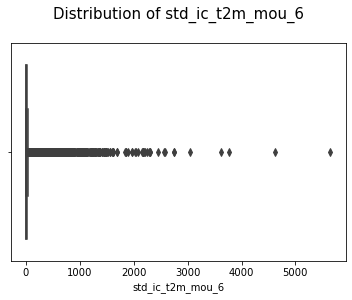


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_ic_t2f_mou_6 column: 

count    96062.000000
mean         2.156397
std         16.495594
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1351.110000
Name: std_ic_t2f_mou_6, dtype: float64

............................................................

Minimum value in std_ic_t2f_mou_6 column:  0.0
Maximum value in std_ic_t2f_mou_6 column:  1351.11

............................................................

Percentage of null values for std_ic_t2f_mou_6 column:  3.937039370393704

............................................................



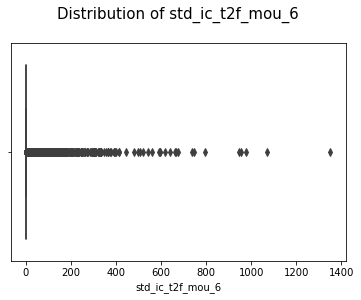


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_ic_t2t_mou_6 column: 

count    96062.000000
mean        47.922365
std        140.258485
min          0.000000
25%          2.990000
50%         15.690000
75%         46.840000
max       6626.930000
Name: loc_ic_t2t_mou_6, dtype: float64

............................................................

Minimum value in loc_ic_t2t_mou_6 column:  0.0
Maximum value in loc_ic_t2t_mou_6 column:  6626.93

............................................................

Percentage of null values for loc_ic_t2t_mou_6 column:  3.937039370393704

............................................................



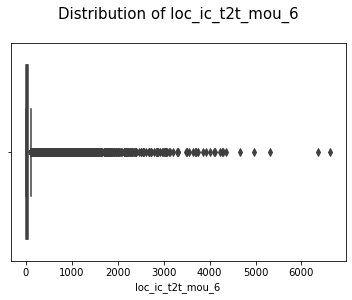


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_ic_t2o_mou_6 column: 

count    96062.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_ic_t2o_mou_6, dtype: float64

............................................................

Minimum value in std_ic_t2o_mou_6 column:  0.0
Maximum value in std_ic_t2o_mou_6 column:  0.0

............................................................

Percentage of null values for std_ic_t2o_mou_6 column:  3.937039370393704

............................................................



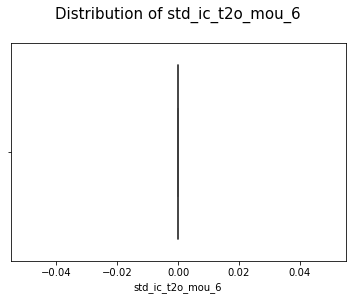


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_ic_t2m_mou_6 column: 

count    96062.000000
mean       107.475650
std        171.713903
min          0.000000
25%         17.290000
50%         56.490000
75%        132.387500
max       4693.860000
Name: loc_ic_t2m_mou_6, dtype: float64

............................................................

Minimum value in loc_ic_t2m_mou_6 column:  0.0
Maximum value in loc_ic_t2m_mou_6 column:  4693.86

............................................................

Percentage of null values for loc_ic_t2m_mou_6 column:  3.937039370393704

............................................................



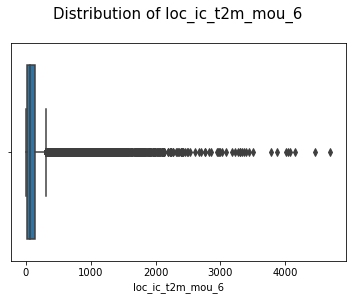


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_ic_mou_6 column: 

count    96062.000000
mean        32.457179
std        106.283386
min          0.000000
25%          0.000000
50%          5.890000
75%         26.930000
max       5712.110000
Name: std_ic_mou_6, dtype: float64

............................................................

Minimum value in std_ic_mou_6 column:  0.0
Maximum value in std_ic_mou_6 column:  5712.11

............................................................

Percentage of null values for std_ic_mou_6 column:  3.937039370393704

............................................................



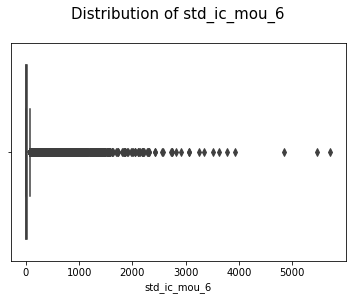


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_ic_t2f_mou_6 column: 

count    96062.000000
mean        12.084305
std         40.140895
min          0.000000
25%          0.000000
50%          0.880000
75%          8.140000
max       1872.340000
Name: loc_ic_t2f_mou_6, dtype: float64

............................................................

Minimum value in loc_ic_t2f_mou_6 column:  0.0
Maximum value in loc_ic_t2f_mou_6 column:  1872.34

............................................................

Percentage of null values for loc_ic_t2f_mou_6 column:  3.937039370393704

............................................................



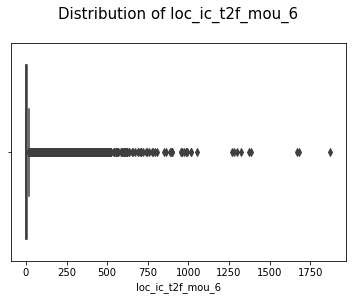


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for isd_ic_mou_6 column: 

count    96062.000000
mean         7.460608
std         59.722948
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6789.410000
Name: isd_ic_mou_6, dtype: float64

............................................................

Minimum value in isd_ic_mou_6 column:  0.0
Maximum value in isd_ic_mou_6 column:  6789.41

............................................................

Percentage of null values for isd_ic_mou_6 column:  3.937039370393704

............................................................



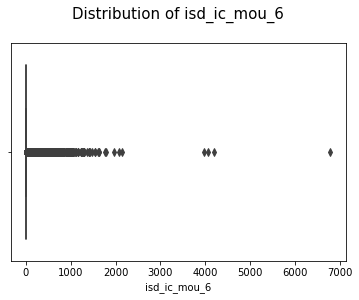


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_ic_t2t_mou_6 column: 

count    96062.000000
mean         9.575993
std         54.330607
min          0.000000
25%          0.000000
50%          0.000000
75%          4.060000
max       5459.560000
Name: std_ic_t2t_mou_6, dtype: float64

............................................................

Minimum value in std_ic_t2t_mou_6 column:  0.0
Maximum value in std_ic_t2t_mou_6 column:  5459.56

............................................................

Percentage of null values for std_ic_t2t_mou_6 column:  3.937039370393704

............................................................



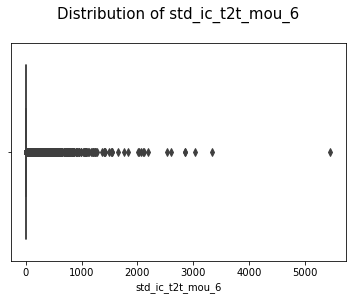


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_ic_mou_6 column: 

count    96062.000000
mean       167.491059
std        254.124029
min          0.000000
25%         30.390000
50%         92.160000
75%        208.075000
max       7454.630000
Name: loc_ic_mou_6, dtype: float64

............................................................

Minimum value in loc_ic_mou_6 column:  0.0
Maximum value in loc_ic_mou_6 column:  7454.63

............................................................

Percentage of null values for loc_ic_mou_6 column:  3.937039370393704

............................................................



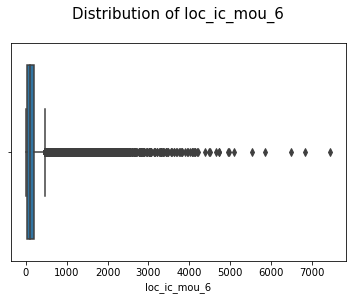


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for roam_og_mou_6 column: 

count    96062.000000
mean        13.911337
std         71.443196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3775.110000
Name: roam_og_mou_6, dtype: float64

............................................................

Minimum value in roam_og_mou_6 column:  0.0
Maximum value in roam_og_mou_6 column:  3775.11

............................................................

Percentage of null values for roam_og_mou_6 column:  3.937039370393704

............................................................



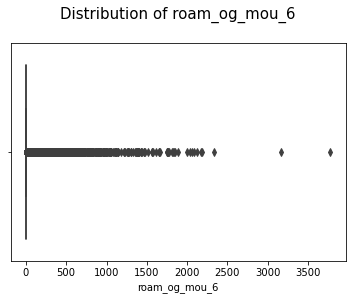


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_og_t2f_mou_6 column: 

count    96062.000000
mean         3.751013
std         14.230438
min          0.000000
25%          0.000000
50%          0.000000
75%          2.080000
max       1466.030000
Name: loc_og_t2f_mou_6, dtype: float64

............................................................

Minimum value in loc_og_t2f_mou_6 column:  0.0
Maximum value in loc_og_t2f_mou_6 column:  1466.03

............................................................

Percentage of null values for loc_og_t2f_mou_6 column:  3.937039370393704

............................................................



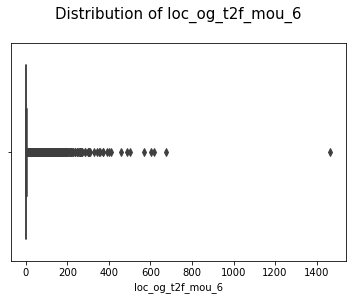


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_og_t2m_mou_6 column: 

count    96062.000000
mean        93.342088
std        162.780544
min          0.000000
25%          9.880000
50%         41.030000
75%        110.390000
max       4729.740000
Name: loc_og_t2m_mou_6, dtype: float64

............................................................

Minimum value in loc_og_t2m_mou_6 column:  0.0
Maximum value in loc_og_t2m_mou_6 column:  4729.74

............................................................

Percentage of null values for loc_og_t2m_mou_6 column:  3.937039370393704

............................................................



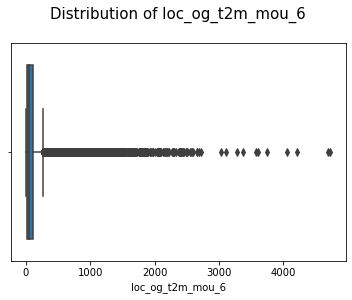


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_og_t2t_mou_6 column: 

count    96062.000000
mean        47.100763
std        150.856393
min          0.000000
25%          1.660000
50%         11.910000
75%         40.960000
max       6431.330000
Name: loc_og_t2t_mou_6, dtype: float64

............................................................

Minimum value in loc_og_t2t_mou_6 column:  0.0
Maximum value in loc_og_t2t_mou_6 column:  6431.33

............................................................

Percentage of null values for loc_og_t2t_mou_6 column:  3.937039370393704

............................................................



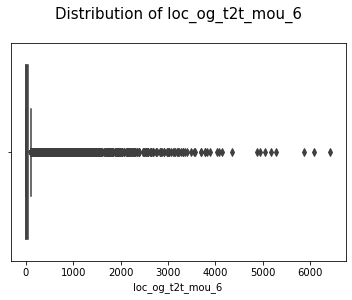


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for roam_ic_mou_6 column: 

count    96062.000000
mean         9.950013
std         72.825411
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      13724.380000
Name: roam_ic_mou_6, dtype: float64

............................................................

Minimum value in roam_ic_mou_6 column:  0.0
Maximum value in roam_ic_mou_6 column:  13724.38

............................................................

Percentage of null values for roam_ic_mou_6 column:  3.937039370393704

............................................................



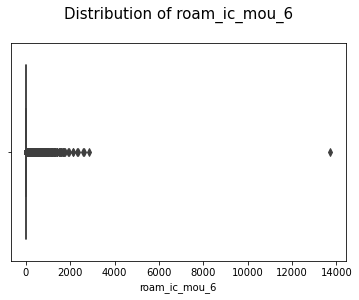


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for offnet_mou_6 column: 

count    96062.000000
mean       197.935577
std        316.851613
min          0.000000
25%         34.730000
50%         96.310000
75%        231.860000
max       8362.360000
Name: offnet_mou_6, dtype: float64

............................................................

Minimum value in offnet_mou_6 column:  0.0
Maximum value in offnet_mou_6 column:  8362.36

............................................................

Percentage of null values for offnet_mou_6 column:  3.937039370393704

............................................................



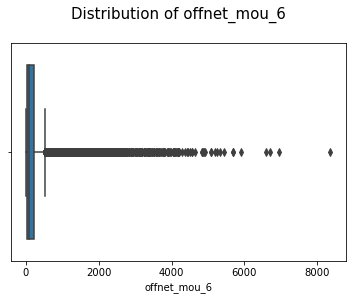


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for onnet_mou_6 column: 

count    96062.000000
mean       132.395875
std        297.207406
min          0.000000
25%          7.380000
50%         34.310000
75%        118.740000
max       7376.710000
Name: onnet_mou_6, dtype: float64

............................................................

Minimum value in onnet_mou_6 column:  0.0
Maximum value in onnet_mou_6 column:  7376.71

............................................................

Percentage of null values for onnet_mou_6 column:  3.937039370393704

............................................................



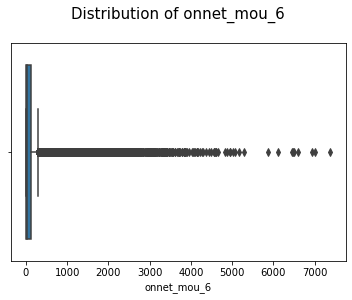


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for ic_others_6 column: 

count    96062.000000
mean         0.854656
std         11.955164
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1362.940000
Name: ic_others_6, dtype: float64

............................................................

Minimum value in ic_others_6 column:  0.0
Maximum value in ic_others_6 column:  1362.94

............................................................

Percentage of null values for ic_others_6 column:  3.937039370393704

............................................................



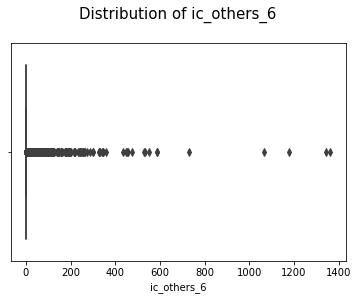


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_og_t2c_mou_6 column: 

count    96062.000000
mean         1.123056
std          5.448946
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        342.860000
Name: loc_og_t2c_mou_6, dtype: float64

............................................................

Minimum value in loc_og_t2c_mou_6 column:  0.0
Maximum value in loc_og_t2c_mou_6 column:  342.86

............................................................

Percentage of null values for loc_og_t2c_mou_6 column:  3.937039370393704

............................................................



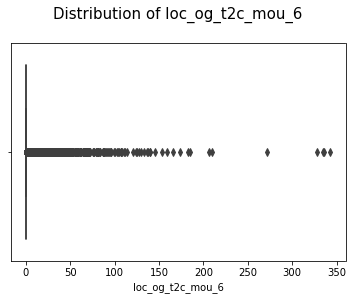


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for loc_og_mou_6 column: 

count    96062.000000
mean       144.201175
std        251.751489
min          0.000000
25%         17.110000
50%         65.110000
75%        168.270000
max      10643.380000
Name: loc_og_mou_6, dtype: float64

............................................................

Minimum value in loc_og_mou_6 column:  0.0
Maximum value in loc_og_mou_6 column:  10643.38

............................................................

Percentage of null values for loc_og_mou_6 column:  3.937039370393704

............................................................



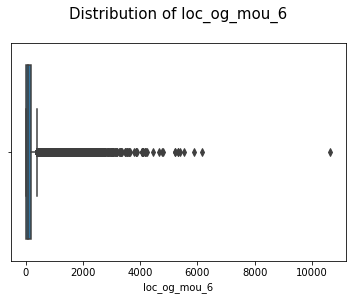


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for spl_ic_mou_6 column: 

count    96062.000000
mean         0.061557
std          0.160920
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         19.760000
Name: spl_ic_mou_6, dtype: float64

............................................................

Minimum value in spl_ic_mou_6 column:  0.0
Maximum value in spl_ic_mou_6 column:  19.76

............................................................

Percentage of null values for spl_ic_mou_6 column:  3.937039370393704

............................................................



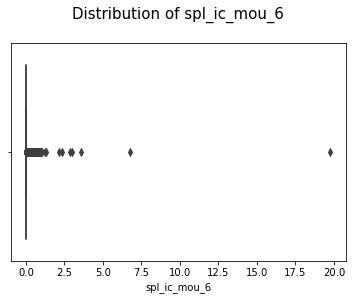


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for og_others_6 column: 

count    96062.000000
mean         0.454157
std          4.125911
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        800.890000
Name: og_others_6, dtype: float64

............................................................

Minimum value in og_others_6 column:  0.0
Maximum value in og_others_6 column:  800.89

............................................................

Percentage of null values for og_others_6 column:  3.937039370393704

............................................................



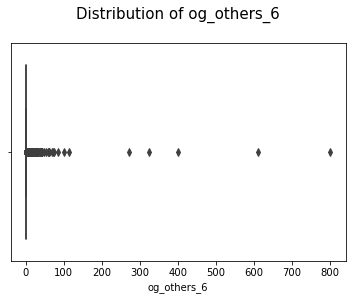


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for spl_og_mou_6 column: 

count    96062.000000
mean         3.916811
std         14.936449
min          0.000000
25%          0.000000
50%          0.000000
75%          2.430000
max       1023.210000
Name: spl_og_mou_6, dtype: float64

............................................................

Minimum value in spl_og_mou_6 column:  0.0
Maximum value in spl_og_mou_6 column:  1023.21

............................................................

Percentage of null values for spl_og_mou_6 column:  3.937039370393704

............................................................



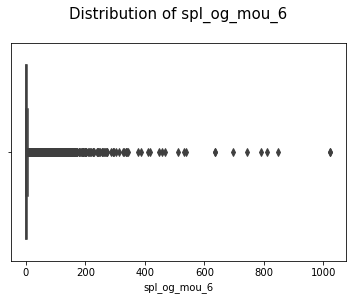


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for isd_og_mou_6 column: 

count    96062.000000
mean         0.798277
std         25.765248
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5900.660000
Name: isd_og_mou_6, dtype: float64

............................................................

Minimum value in isd_og_mou_6 column:  0.0
Maximum value in isd_og_mou_6 column:  5900.66

............................................................

Percentage of null values for isd_og_mou_6 column:  3.937039370393704

............................................................



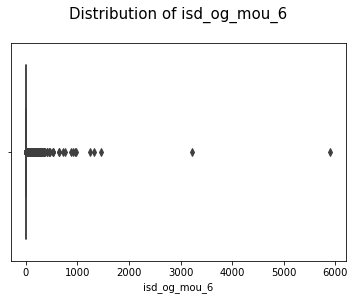


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_og_mou_6 column: 

count    96062.000000
mean       168.261218
std        389.948499
min          0.000000
25%          0.000000
50%         11.640000
75%        144.837500
max       8432.990000
Name: std_og_mou_6, dtype: float64

............................................................

Minimum value in std_og_mou_6 column:  0.0
Maximum value in std_og_mou_6 column:  8432.99

............................................................

Percentage of null values for std_og_mou_6 column:  3.937039370393704

............................................................



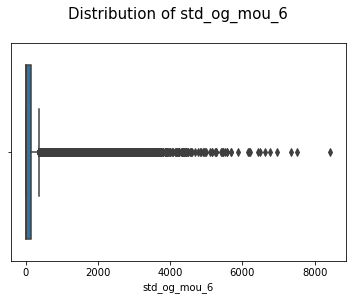


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_og_t2c_mou_6 column: 

count    96062.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2c_mou_6, dtype: float64

............................................................

Minimum value in std_og_t2c_mou_6 column:  0.0
Maximum value in std_og_t2c_mou_6 column:  0.0

............................................................

Percentage of null values for std_og_t2c_mou_6 column:  3.937039370393704

............................................................



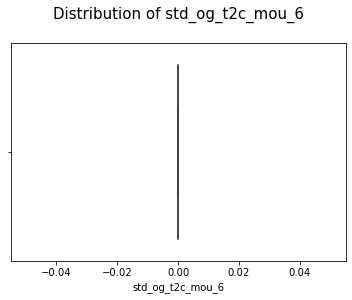


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_og_t2f_mou_6 column: 

count    96062.000000
mean         1.129011
std          7.984970
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        628.560000
Name: std_og_t2f_mou_6, dtype: float64

............................................................

Minimum value in std_og_t2f_mou_6 column:  0.0
Maximum value in std_og_t2f_mou_6 column:  628.56

............................................................

Percentage of null values for std_og_t2f_mou_6 column:  3.937039370393704

............................................................



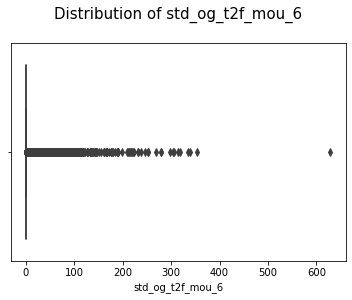


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_og_t2m_mou_6 column: 

count    96062.000000
mean        87.299624
std        255.617850
min          0.000000
25%          0.000000
50%          3.950000
75%         53.290000
max       8314.760000
Name: std_og_t2m_mou_6, dtype: float64

............................................................

Minimum value in std_og_t2m_mou_6 column:  0.0
Maximum value in std_og_t2m_mou_6 column:  8314.76

............................................................

Percentage of null values for std_og_t2m_mou_6 column:  3.937039370393704

............................................................



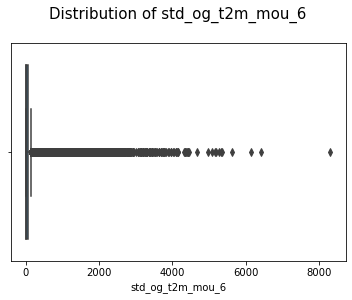


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

Statistical information for std_og_t2t_mou_6 column: 

count    96062.000000
mean        79.829870
std        252.476533
min          0.000000
25%          0.000000
50%          0.000000
75%         30.807500
max       7366.580000
Name: std_og_t2t_mou_6, dtype: float64

............................................................

Minimum value in std_og_t2t_mou_6 column:  0.0
Maximum value in std_og_t2t_mou_6 column:  7366.58

............................................................

Percentage of null values for std_og_t2t_mou_6 column:  3.937039370393704

............................................................



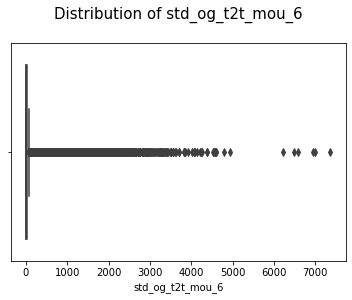


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [17]:
for i in data[jun_nulls].columns:
    print()
    print('Statistical information for {} column: '.format(i))
    print()
    print(data[i].describe())
    print()
    print('.' * 60)
    print()
    print('Minimum value in {} column: '.format(i),data[i].min())
    print('Maximum value in {} column: '.format(i),data[i].max())
    print()
    print('.' * 60)
    print()
    print('Percentage of null values for {} column: '.format(i), data[i].isnull().sum()*100/len(data))
    print()
    print('.' * 60)
    print()
    sns.boxplot(data[i])
    plt.title('Distribution of {}\n'.format(i),fontdict={'fontsize':15,'color':'k'})
    plt.show()
    print()
    print('X'*60)

### Since most of the colums have outliers, imputing the missing values with median

In [18]:
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(),inplace=True)

### Rechecking null values in the data

In [19]:
null_df(data)

,Features,Perc_nulls
0,loc_og_t2o_mou,0.0
1,std_og_t2o_mou,0.0
2,std_ic_mou_7,0.0
3,std_ic_mou_8,0.0
4,std_ic_mou_9,0.0
5,total_ic_mou_6,0.0
6,total_ic_mou_7,0.0
7,total_ic_mou_8,0.0
8,total_ic_mou_9,0.0
9,spl_ic_mou_6,0.0


### High Value Customers (HVC)

Those who have recharged with an amount more than or equal to X, where X is the <font color = red>70th percentile</font> of the average recharge amount in the first two months (the good phase) </font>

#### Partitioing data into good, action and churn phases

In [20]:
good_phase = []
action_phase = []
churn_phase = []
gen_cols = []

for col in data.columns:
    if '_6' in col or 'jun' in col:
        good_phase.append(col)
    elif '_7' in col or 'jul' in col:
        good_phase.append(col)
    elif '_8' in col or 'aug' in col:
        action_phase.append(col)
    elif '_9' in col or 'sep' in col:
        churn_phase.append(col)
    else:
        gen_cols.append(col)

In [21]:
print('Feautures with Good phase data: ',len(good_phase))
print('Feautures with Action phase data: ',len(action_phase))
print('Feautures with Churn phase: ',len(churn_phase))
print('General Features: ',len(gen_cols))

Feautures with Good phase data:  86
Feautures with Action phase data:  43
Feautures with Churn phase:  43
General Features:  4


In [22]:
data['avg_rech_good_phase'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/((data['total_rech_num_6'] + data['total_rech_num_7']))

In [23]:
data['avg_rech_good_phase'].describe()

count    99814.000000
mean        48.304356
std         52.076165
min          0.000000
25%         20.428571
50%         36.645752
75%         63.111111
max       4010.000000
Name: avg_rech_good_phase, dtype: float64

In [24]:
data['avg_rech_good_phase'].quantile(0.7)

56.38751753155677

In [25]:
HVC = data[data['avg_rech_good_phase'] >= data['avg_rech_good_phase'].quantile(0.7)]

In [26]:
HVC.shape

(29944, 177)

#### Hence from the above we found out that there are 29,944 High Value Customers

## Tagging Churners i.e., finding out the Target variable

In [27]:
HVC[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29944.000000,29944.000000,29944.000000,29944.000000
mean,256.142226,440.721478,52.819647,262.832119
std,331.609907,600.162447,217.037380,837.517844
min,0.000000,0.000000,0.000000,0.000000
25%,54.380000,69.237500,0.000000,0.000000
50%,162.210000,252.175000,0.000000,0.000000
75%,338.312500,573.082500,2.792500,0.000000
max,10796.590000,11140.110000,8680.130000,39221.270000


In [28]:
HVC['total'] = HVC['total_ic_mou_9']+HVC['total_og_mou_9']+HVC['vol_2g_mb_9']+HVC['vol_3g_mb_9']

In [29]:
HVC['Churn'] = HVC['total'].map(lambda x: '1' if x == 0 else '0')

HVC.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase,total,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,87.714286,0.00,1
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14

###  Removing attributes of the churn phase i.e, septemberm

In [30]:
HVC.drop(churn_phase,axis=1,inplace=True)
HVC.drop(['avg_rech_good_phase','total'],axis=1,inplace=True)
    
print('Total number of records in the HVC data: ',HVC.shape[0])
print('Total number of features in the HVC after dropping columns: ',HVC.shape[1])

Total number of records in the HVC data:  29944
Total number of features in the HVC after dropping columns:  134


### Imbalance Ratio

In [31]:
HVC['Churn'].value_counts(normalize=True)*100

0    91.310446
1     8.689554
Name: Churn, dtype: float64

### The dataset is heavily imbalanced i.e., ~9% of the High Value Customers are Churning

## 5. Exploratory Data Analysis <a ID=5></a>
[Table of Contents](#0.1)

#### Age On Network (AON)

In [32]:
df = HVC.copy()



df['aon_months'] = df['aon'].apply(lambda x: round(x/30,1))

df['aon_years'] = df['aon_months'].apply(lambda x: round(x/12,1))

df[['aon','aon_months','aon_years','Churn']].head()

,aon,aon_months,aon_years,Churn
mobile_number,,,,
7000842753,968,32.3,2.7,1
7000701601,802,26.7,2.2,1
7001864400,902,30.1,2.5,0
7002191713,2607,86.9,7.2,0
7000875565,511,17.0,1.4,0


In [33]:
def year_bucket(x):
    if x <= 1:
        return '0-1'
    elif x <= 2:
        return '1-2'
    elif x <= 3:
        return '2-3'
    else:
        return '3+'

    
df['aon_buckets'] = df['aon_years'].apply(lambda x: year_bucket(x))

df[['aon','aon_months','aon_years','aon_buckets','Churn']].head()    

,aon,aon_months,aon_years,aon_buckets,Churn
mobile_number,,,,,
7000842753,968,32.3,2.7,2-3,1
7000701601,802,26.7,2.2,2-3,1
7001864400,902,30.1,2.5,2-3,0
7002191713,2607,86.9,7.2,3+,0
7000875565,511,17.0,1.4,1-2,0


In [34]:
df.aon_buckets.value_counts(normalize=True)

3+     0.511855
1-2    0.208022
0-1    0.154488
2-3    0.125635
Name: aon_buckets, dtype: float64

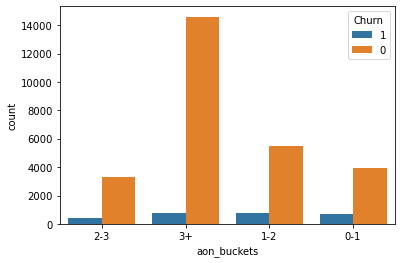

In [35]:
sns.countplot(data = df,x= 'aon_buckets',hue='Churn')
plt.show()

In [36]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,aon_months,aon_years,aon_buckets
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,32.3,2.7,2-3
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,26.7,2.2,2-3
7001864400,0.0,0.0,0.0,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.160,78.34,0.00,0.00,0.00,0.00,0.00,0.00,33.89,30.11,22.43,38.03,40.06,34.93,0.00,0.00,0.00,0.0,0.0,0.00,71.93,70.180,57.36,0.00,0.00,0.00,25.45,14.090,43.41,0.00,0.00,0.00,0.0,0.0,0.0,25.45,14.09,43.41,0.0,0.00,0.00,0.66,0.00,0.00,0.0,0.0,0.0,98.04,84.28,100.78,129.34,124.34,49.93,132.94,96.24,122.58,0.40,0.00,0.00,262.69,220.59,172.51,0.30,0.00,0.00,32.86,78.21,1.74,0.00,0.00,0.00,0.0,0.0,0.0,33.16,78.21,1.74,3

In [37]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,aon_months,aon_years,aon_buckets
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,0.0,0.0,0.0,197.385,214.816,213.803,34.31,32.33,0.00,96.31,91.735,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.91,11.61,0.00,41.03,40.43,0.00,0.00,0.00,0.00,0.0,0.0,0.00,65.11,63.685,0.00,0.00,0.00,0.00,3.95,3.635,0.00,0.00,0.00,0.00,0.0,0.0,0.0,11.64,11.09,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,15.69,15.74,0.16,56.49,57.08,4.13,0.88,0.93,1.15,92.16,92.55,5.44,0.00,0.00,0.00,2.03,2.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,5.89,5.96,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,32.3,2.7,2-3
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.910,255.79,4.30,23.29,12.01,49.89,31.760,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1,26.7,2.2,2-3
7001864400,0.0,0.0,0.0,119.518,247.435,170.231,33.89,30.11,22.43,63.48,54.160,78.34,0.00,0.00,0.00,0.00,0.00,0.00,33.89,30.11,22.43,38.03,40.06,34.93,0.00,0.00,0.00,0.0,0.0,0.00,71.93,70.180,57.36,0.00,0.00,0.00,25.45,14.090,43.41,0.00,0.00,0.00,0.0,0.0,0.0,25.45,14.09,43.41,0.0,0.00,0.00,0.66,0.00,0.00,0.0,0.0,0.0,98.04,84.28,100.78,129.34,124.34,49.93,132.94,96.24,122.58,0.40,0.00,0.00,262.69,220.59,172.51,0.30,0.00,0.00,32.86,78.21,1.74,0.00,0.00,0.00,0.0,0.0,0.0,33.16,78.21,1.74,3

#### Average Revenue Per User (ARPU)

<AxesSubplot:xlabel='arpu_8', ylabel='Density'>

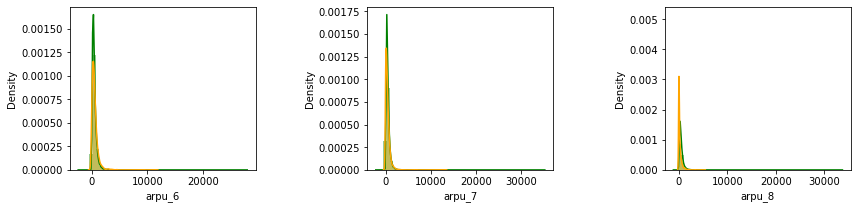

In [38]:
plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,3,1)
sns.distplot(df[(df['Churn'] == '0')]['arpu_6'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['arpu_6'],color='orange')

plt.subplot(1,3,2)
sns.distplot(df[(df['Churn'] == '0')]['arpu_7'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['arpu_7'],color='orange')

plt.subplot(1,3,3)
sns.distplot(df[(df['Churn'] == '0')]['arpu_8'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['arpu_8'],color='orange')

In [39]:
for col in df.columns:
    if 'total' in col:
        print(col)

total_og_mou_6
total_og_mou_7
total_og_mou_8
total_ic_mou_6
total_ic_mou_7
total_ic_mou_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8


### Total recharge amount

<AxesSubplot:xlabel='total_rech_amt_8', ylabel='Density'>

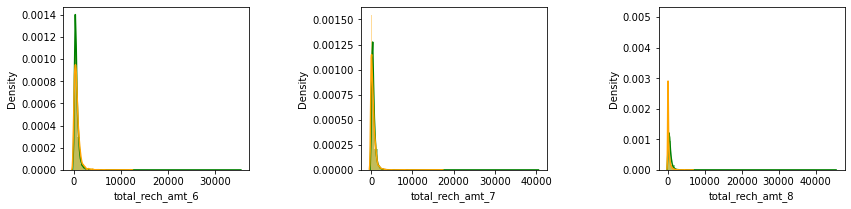

In [40]:
plt.figure(figsize=(14,3))
plt.subplots_adjust(wspace=0.6)

plt.subplot(1,3,1)
sns.distplot(df[(df['Churn'] == '0')]['total_rech_amt_6'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['total_rech_amt_6'],color='orange')

plt.subplot(1,3,2)
sns.distplot(df[(df['Churn'] == '0')]['total_rech_amt_7'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['total_rech_amt_7'],color='orange')

plt.subplot(1,3,3)
sns.distplot(df[(df['Churn'] == '0')]['total_rech_amt_8'],color='green')
sns.distplot(df[(df['Churn'] == '1')]['total_rech_amt_8'],color='orange')

### Heatmap of correlation matrix

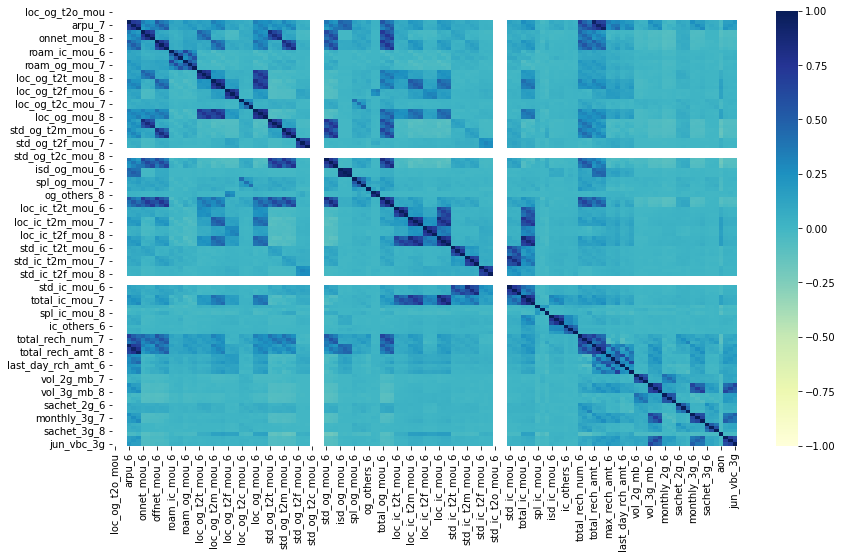

In [41]:
plt.figure(figsize=(14,8))
sns.heatmap(HVC.corr(),cmap='YlGnBu',center=0.0,vmax=1.0,vmin=-1.0)
plt.show()

## 5. Inferences <a ID=5.1></a>
[Table of Contents](#0.1)

The following are the inferences made from EDA
- Majority of the High Value Customers (~51%) are using the same service for more than 3 years
- Distribution for ARPU is skewed towards left for 3 months
- ARPU is high in June and July (good-phase) for Non-Churners
- ARPU is high in August (action-phase) for Churners
- Total Recharge amount in June and July (good-phase) for Non-Churners
- There is high positive correlation among some of the features. They shall be treated will creating model using PCA

In [42]:
HVC['Churn'].astype('int64')

mobile_number
7000842753    1
7000701601    1
7001864400    0
7002191713    0
7000875565    0
             ..
7002373887    0
7001729035    0
7000964736    0
7000498689    0
7001905007    1
Name: Churn, Length: 29944, dtype: int64

In [43]:
HVC.shape

(29944, 134)

## 6. Splitting Data and Rescaling Features <a ID=6></a>
[Table of Contents](#0.1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Splitting the data X and y

In [45]:
y = HVC.pop('Churn')
X = HVC

print('Shape of Target Variable: ', y.shape)
print('Shape of X: ', X.shape)

Shape of Target Variable:  (29944,)
Shape of X:  (29944, 133)


### Splitting the data into Train and Test sets

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (20960, 133)
Shape of y_train:  (20960,)
Shape of X_test:  (8984, 133)
Shape of y_test:  (8984,)


### Scaling Features using MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
cols = []
for col in X_train.columns:
    cols.append(col)
    
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

## 7. Model Building <a ID=7></a>
[Table of Contents](#0.1)

### Building a simple model to set a base line on metrics
### <font color = red>i. Logistic Regression</font><a ID=7.1></a>
[Table of Contents](#0.1)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve

In [51]:
logm = LogisticRegression()

logm.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_train_pred = logm.predict(X_train)
y_test_pred = logm.predict(X_test)

In [53]:
logm_results = pd.DataFrame({'Act':y_train.values,'Pred':y_train_pred})
logm_results['Mobiles_Number'] = y_train.index

In [54]:
logm_results.head()

,Act,Pred,Mobiles_Number
0,0,0,7000917853
1,0,0,7001921469
2,0,1,7002131017
3,0,0,7001803887
4,0,0,7001853524


### ROC Curve

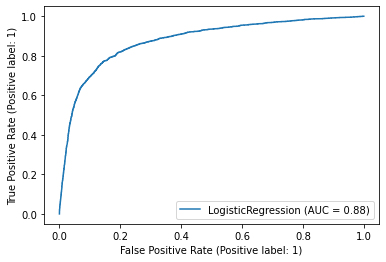

In [55]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logm, X_train, y_train, drop_intermediate=False)
plt.show()

In [56]:
logm_roc_score = round(roc_auc_score(logm_results.Act,logm_results.Pred),2)
logm_roc_score

0.54

In [57]:
logm_acc_score_train = round(accuracy_score(logm_results.Act,logm_results.Pred),3)
logm_acc_score_train

0.915

In [58]:
logm_acc_score_test = round(accuracy_score(y_test,y_test_pred),3)
logm_acc_score_test

0.92

### Logistic Regression model  is overfitting

### Deciding on the best evaluation metric for the business problem:
#### Our goal is to correctly predict the High Value customers who will churn .i.e., the model needs to correctly identify 1's. Hence the senstivity/Recall should be the best model evaluation metric

In [59]:
def model_metrics_train(act,pred):
    model_accuracy = round(accuracy_score(act,pred),3)
    model_cm = confusion_matrix(act,pred)
    model_recall = round(model_cm[1,1] / (model_cm[1,1]+model_cm[0,1]),3)
    auc_score = round(roc_auc_score(act,pred),2)
    print('Accuracy score on train data: ',model_accuracy)
    print('Recall Score on train data: ',model_recall)
    print('ROC_AUC score on the train data: ',auc_score)

In [60]:
def model_metrics_test(act,pred):
    model_accuracy = round(accuracy_score(act,pred),3)
    model_cm = confusion_matrix(act,pred)
    model_recall = round(model_cm[1,1] / (model_cm[1,1]+model_cm[0,1]),3)
    auc_score = round(roc_auc_score(act,pred),2)
    print('Accuracy score on test data: ',model_accuracy)
    print('Recall Score on test data: ',model_recall)
    print('ROC_AUC score on the test data: ',auc_score)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
con_mat = confusion_matrix(logm_results.Act,logm_results.Pred)
con_mat

array([[19013,    98],
       [ 1680,   169]], dtype=int64)

In [63]:
TN = con_mat[0,0]
TP = con_mat[1,1]
FN = con_mat[0,1]
FP = con_mat[1,0]

In [64]:
logm_recall = round(TP/(TP+FN),2)
logm_recall

0.63

In [65]:
model_metrics_train(logm_results.Act,logm_results.Pred)

Accuracy score on train data:  0.915
Recall Score on train data:  0.633
ROC_AUC score on the train data:  0.54


In [66]:
model_metrics_test(y_test,y_test_pred)

Accuracy score on test data:  0.92
Recall Score on test data:  0.627
ROC_AUC score on the test data:  0.55


### Logistic Regression model is overfitting the data

### <font color = red>ii. Logistic Regression with SMOTETomek for handling imbalance<a ID=7.2></a>
[Table of Contents](#0.1)

In [67]:
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=42)
X_train_smt_tmk,y_train_smt_tmk = smt_tmk.fit_resample(X_train,y_train)
logm_smt_tmk = LogisticRegression()
logm_smt_tmk.fit(X_train_smt_tmk,y_train_smt_tmk)


LogisticRegression()

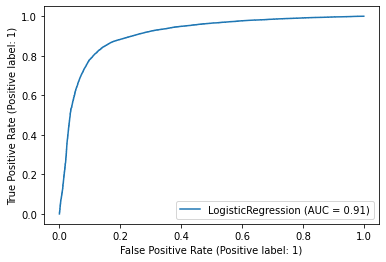

In [68]:
plot_roc_curve(logm_smt_tmk, X_train_smt_tmk,y_train_smt_tmk, drop_intermediate=False)
plt.show()

In [69]:
model_metrics_train(y_train_smt_tmk,logm_smt_tmk.predict(X_train_smt_tmk))

Accuracy score on train data:  0.845
Recall Score on train data:  0.824
ROC_AUC score on the train data:  0.84


In [70]:
model_metrics_test(y_test,logm_smt_tmk.predict(X_test))

Accuracy score on test data:  0.807
Recall Score on test data:  0.284
ROC_AUC score on the test data:  0.83


### With Random oversampling the results are far better than Logistic Regression

### <font color = red>iii. Decision Tree with hyperparameter tuning</font><a ID=7.3></a>
[Table of Contents](#0.1)

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
dtc = DecisionTreeClassifier(random_state=42)

In [73]:
params = { 'max_depth': [2,3,5,10,15,20],
           'min_samples_leaf': [5,10,20,50,75,100],
           'criterion': ['gini','entropy']
         }

In [74]:
grid_search = GridSearchCV(estimator=dtc,param_grid=params,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')

In [75]:
%%time
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 3.73 s
Wall time: 1min 56s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100]},
             scoring='accuracy', verbose=2)

In [76]:
dtc_best = grid_search.best_estimator_
dtc_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=42)

In [77]:
dtc_best_score_train = round(grid_search.best_score_,2)
dtc_best_score_train

0.95

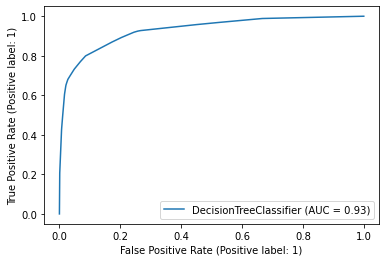

In [78]:
plot_roc_curve(dtc_best, X_train,y_train, drop_intermediate=False)
plt.show()

In [79]:
model_metrics_train(y_train,dtc_best.predict(X_train))

Accuracy score on train data:  0.95
Recall Score on train data:  0.777
ROC_AUC score on the train data:  0.79


In [80]:
model_metrics_test(y_test,dtc_best.predict(X_test))

Accuracy score on test data:  0.949
Recall Score on test data:  0.752
ROC_AUC score on the test data:  0.78


### Decision tree with Hyper Parameter Tuning gave far better results than Decision Tree with and without class imbalance handling

### Important Features

In [81]:
imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Imp": dtc_best.feature_importances_
})

imp_df = imp_df.sort_values(by="Imp", ascending=False)
imp_df

,Feature,Imp
89,total_ic_mou_8,0.729507
17,roam_og_mou_8,0.061758
104,total_rech_amt_8,0.049681
110,last_day_rch_amt_8,0.047176
71,loc_ic_mou_8,0.016002
46,std_og_mou_7,0.014460
116,vol_3g_mb_8,0.012821
101,total_rech_num_8,0.010630
70,loc_ic_mou_7,0.007141
59,total_og_mou_8,0.006796


### <font color = red>iv. Decision Tree with hyperparameter tuning and SMOTETomek for handling class imbalance</font><a ID=7.4></a>
[Table of Contents](#0.1)

In [82]:
grid_search_os = GridSearchCV(estimator=dtc,param_grid=params,cv=5,n_jobs=-1,verbose=2,scoring='accuracy')
grid_search_os.fit(X_train_smt_tmk,y_train_smt_tmk)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100]},
             scoring='accuracy', verbose=2)

In [83]:
dtc_best_os = grid_search.best_estimator_

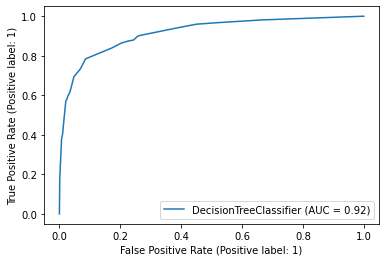

In [84]:
plot_roc_curve(dtc_best_os,X_train_smt_tmk,y_train_smt_tmk,drop_intermediate=True)

In [85]:
model_metrics_train(y_train_smt_tmk,dtc_best_os.predict(X_train_smt_tmk))

Accuracy score on train data:  0.744
Recall Score on train data:  0.968
ROC_AUC score on the train data:  0.74


In [86]:
model_metrics_train(y_test,dtc_best_os.predict(X_test))

Accuracy score on train data:  0.949
Recall Score on train data:  0.752
ROC_AUC score on the train data:  0.78


### Decision Tree with imbalance handling is overfitting the data

### <font color = red>v. Random Forest with hyperparameter tuning</font><a ID=7.5></a>
[Table of Contents](#0.1)

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(n_jobs=-1,random_state=42,oob_score=True,bootstrap=True)

In [89]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

grid_search_rfc = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [90]:
%%time
grid_search_rfc.fit(X_train,y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: total: 14 s
Wall time: 5min 20s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [91]:
rfc_best = grid_search_rfc.best_estimator_

In [92]:
grid_search_rfc.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42)

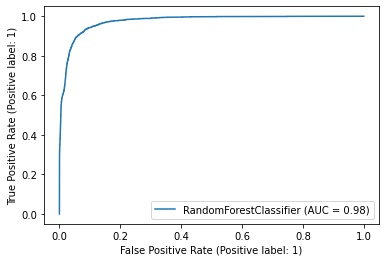

In [93]:
plot_roc_curve(rfc_best,X_train,y_train,drop_intermediate=True)

In [94]:
model_metrics_train(y_train,rfc_best.predict(X_train))

Accuracy score on train data:  0.954
Recall Score on train data:  0.828
ROC_AUC score on the train data:  0.8


In [95]:

imp_df_rf = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rfc_best.feature_importances_
})

imp_df_rf = imp_df_rf.sort_values(by="Imp", ascending=False,ignore_index=True)

imp_df_rf

,Varname,Imp
0,total_ic_mou_8,1.489308e-01
1,total_og_mou_8,1.028658e-01
2,arpu_8,6.708272e-02
3,total_rech_amt_8,5.459737e-02
4,max_rech_amt_8,3.323258e-02
5,loc_ic_mou_8,3.150001e-02
6,total_ic_mou_7,2.703785e-02
7,loc_og_t2m_mou_8,2.558595e-02
8,loc_og_mou_8,2.421614e-02
9,loc_ic_t2m_mou_8,2.409354e-02


### <font color = red>vi. Logistic Regression with PCA</font><a ID=7.6></a>
[Table of Contents](#0.1)

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [98]:
pca.explained_variance_ratio_[:10]

array([0.24943987, 0.15837882, 0.08400944, 0.06895144, 0.03759712,
       0.03620287, 0.02902148, 0.02816778, 0.02298405, 0.01719394])

### Scree Plot

Text(0.5, 0, 'Number of components')

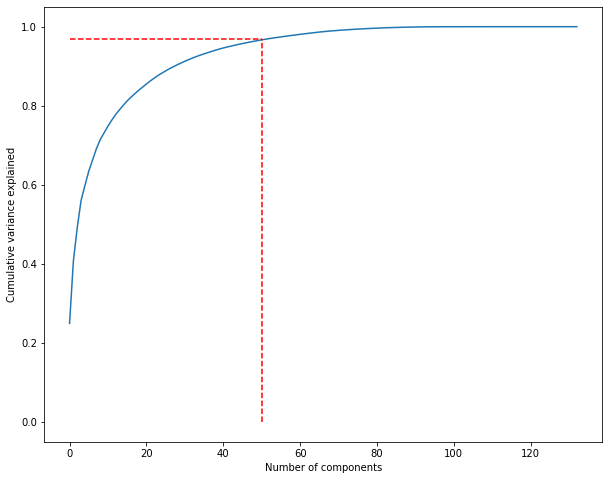

In [99]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
plt.plot(cum_var)
plt.vlines(x=50,ymin=0,ymax=0.97,colors='r',linestyles='--')
plt.hlines(y=0.97,xmin=0,xmax=50,colors='r',linestyles='--')
plt.ylabel('Cumulative variance explained')
plt.xlabel('Number of components')

#### From the above scree plot, 50 of the components explain ove 98% of the variance in the data. Hence selecting number of components as 50

In [100]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [101]:
corr_mat = np.corrcoef(X_train_pca.transpose())

corr_mat.shape

(50, 50)

<AxesSubplot:>

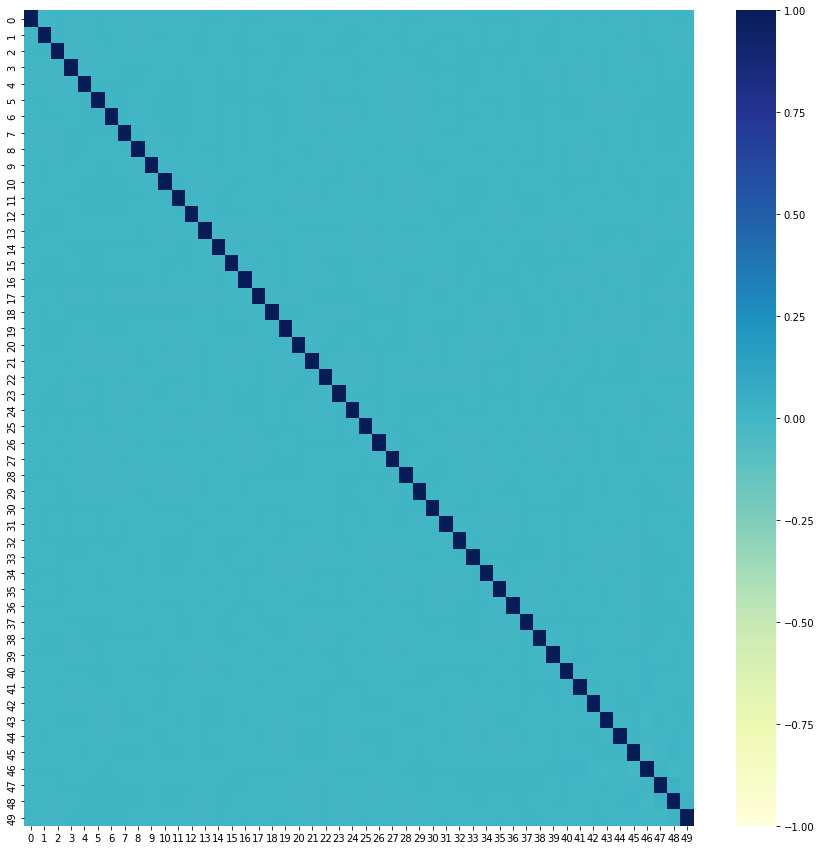

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,cmap='YlGnBu',center=0.0,vmax=1,vmin=-1)

In [103]:
from sklearn.linear_model import LogisticRegression

logm_pca = LogisticRegression()

logm_pca.fit(X_train_pca,y_train)

LogisticRegression()

In [104]:
model_metrics_train(y_train,logm_pca.predict(X_train_pca))

Accuracy score on train data:  0.915
Recall Score on train data:  0.633
ROC_AUC score on the train data:  0.54


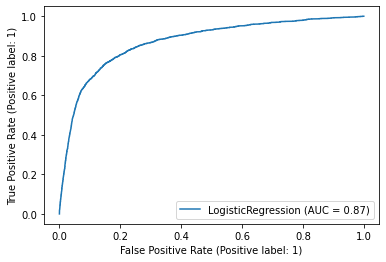

In [105]:
plot_roc_curve(logm_pca,X_train_pca,y_train,drop_intermediate=True)

### <font color = red>8. Finalizing Model selection using the results obtained</font><a ID=8></a>
[Table of Contents](#0.1)

In [106]:
# Logistic Regression
model_metrics_train(y_train,logm.predict(X_train))

Accuracy score on train data:  0.915
Recall Score on train data:  0.633
ROC_AUC score on the train data:  0.54


In [107]:
# Logistic Regression with class imbalance handling
model_metrics_train(y_train_smt_tmk,logm.predict(X_train_smt_tmk))

Accuracy score on train data:  0.535
Recall Score on train data:  0.936
ROC_AUC score on the train data:  0.54


In [108]:
# Decision Tree with HPT
model_metrics_train(y_train,dtc_best.predict(X_train))

Accuracy score on train data:  0.95
Recall Score on train data:  0.777
ROC_AUC score on the train data:  0.79


In [109]:
# Decision Tree with HPT and with class imbalance handling
model_metrics_train(y_train_smt_tmk,dtc_best_os.predict(X_train_smt_tmk))

Accuracy score on train data:  0.744
Recall Score on train data:  0.968
ROC_AUC score on the train data:  0.74


In [110]:
# Random Forest
model_metrics_train(y_train,rfc_best.predict(X_train))

Accuracy score on train data:  0.954
Recall Score on train data:  0.828
ROC_AUC score on the train data:  0.8


In [111]:
# Logistic Regression with PCA
model_metrics_train(y_train,logm_pca.predict(X_train_pca))

Accuracy score on train data:  0.915
Recall Score on train data:  0.633
ROC_AUC score on the train data:  0.54


In [115]:
models = ['Logistic Regression','Logistic Regression with SMOTETomek','Decision Tree','Decsion Tree with SMOTETomek','Random Forest','Logistic Regression with PCA']
accuracy = [0.915,0.535,0.95,0.744,0.954,0.915]
recall = [0.633,0.936,0.777,0.968,0.828,0.633]
auc = [0.54,0.54,0.79,0.74,0.8,0.54]

In [116]:
results = pd.DataFrame({ 
            'model':models,
            'accuracy':accuracy,
            'Recall':recall,
            'AUC_score': auc
          })
results = results.sort_values(by=['accuracy','Recall'],ascending=False,ignore_index=True)
results.head(6)

,model,accuracy,Recall,AUC_score
0,Random Forest,0.954,0.828,0.80
1,Decision Tree,0.950,0.777,0.79
2,Logistic Regression,0.915,0.633,0.54
3,Logistic Regression with PCA,0.915,0.633,0.54
4,Decsion Tree with SMOTETomek,0.744,0.968,0.74
5,Logistic Regression with SMOTETomek,0.535,0.936,0.54


## Logistic regression models are overfitting the data and hence selecting Random Forest as the best model for this problem

### <font color = red>9. Important Features</font><a ID=9></a>
[Table of Contents](#0.1)

In [114]:
# Top 10 features
imp_df_rf[:10]

,Varname,Imp
0,total_ic_mou_8,0.148931
1,total_og_mou_8,0.102866
2,arpu_8,0.067083
3,total_rech_amt_8,0.054597
4,max_rech_amt_8,0.033233
5,loc_ic_mou_8,0.031500
6,total_ic_mou_7,0.027038
7,loc_og_t2m_mou_8,0.025586
8,loc_og_mou_8,0.024216
9,loc_ic_t2m_mou_8,0.024094


### <font color = red>10. Business Recommendations</font><a ID=10></a>
[Table of Contents](#0.1)

- Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group
- Average revenue per user seems to be one of the most important features in determining churn prediction
- Incoming and Outgoing Calls for 8th month are strong indicators of churn behaviour
- Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).